In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
 X = df[['battery_power','dual_sim','int_memory','int_memory','ram',]]
 X[:5]

,battery_power,dual_sim,int_memory,int_memory,ram
0,842,0,7,7,2549
1,1021,1,53,53,2631
2,563,1,41,41,2603
3,615,0,10,10,2769
4,1821,0,44,44,1411


In [5]:
y = df['price_range']
y[:5]

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [7]:
df.price_range.unique()

array([1, 2, 3, 0])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
lr = LogisticRegression()
bnb = BernoulliNB()
mnb= MultinomialNB()
gnb = GaussianNB()
dr = DecisionTreeClassifier()
rf= RandomForestClassifier()

In [15]:
sr = lr.fit(X_train,y_train)
sr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
y_pred[:5]

array([0, 1, 2, 3, 1])

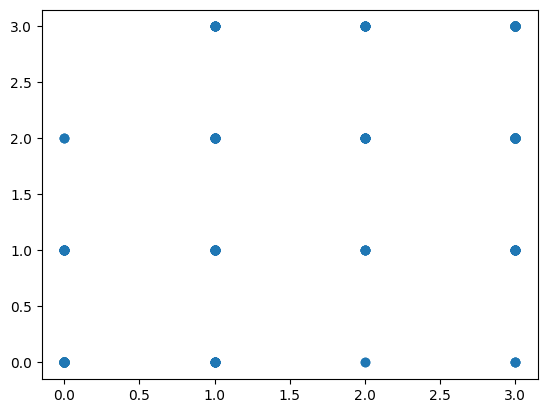

In [20]:
plt.scatter(y_pred,y_test)


In [30]:
from sklearn.metrics import confusion_matrix


In [24]:
m = confusion_matrix(y_pred,y_test)
m

array([[73, 24,  3,  0],
       [19, 33, 29, 12],
       [ 2,  6, 19, 15],
       [ 4, 24, 65, 72]])

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
acc = accuracy_score(y_pred,y_test)*100
acc

49.25

In [37]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [41]:
mnb.score(X_test,y_test)* 100

40.25

In [45]:
dr.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
dr.score(X_test,y_test)* 100

75.75

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
rf.score(X_test,y_test)* 100

79.5

In [54]:
gnb.fit(X_train,y_train)

GaussianNB()

In [55]:
gnb.score(X_test,y_test)* 100

74.75